<a href="https://github.com/joannechoi/DATA-690-WANG/blob/main/world_development_explorer/Final/wdx_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

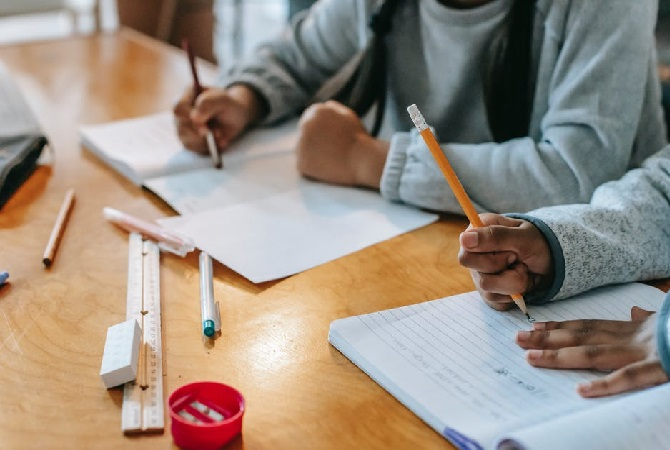

# Importance of Education in World Development 

## **Introduction**

Education is often seen as the marker of success in society today. Individually, we can expand our knowledge and find opportunities for intellectual and career growth through education. As a society, education will help us build healthier communities, stable economy, and greater equality.

In the "Quality of Education" analysis, various methods of measuring outcome of education was analyzed (Roser et al, 2013). These methods include evaluating test scores from tests such as *Program for International Student Assessment* (PISA) and *Progress in International Reading Literacy Study* (PIRLS) assessments along with many other educational surveys and tests. This research combined the results of multiple assessment and compared them to the GDP per capita of each country. Roser et al concluded that richer countries tended to have higher scores on various educational assessments.

Literacy rate is the most widely available metric for education outcome. Therefore, this analysis will be compare literacy rate to other world development indicators to determine how impactful education is in economic growth of a nation. 

### **Literacy Rate**

One of the most critical indicators for education is literacy rate. Literacy rate is defined as percentage of population of a given age group that can read and write. The age groups are divided into three categories: youth, adult, and elderly. 
- Youth group includes ages between 15 to 24
- Adult group includes ages 15 and older 
- Elderly group includes ages 65 and older. 

Youth literacy rate is particularly important because of the compounding effects of lack of education has on a society. If a child is not able to learn to read at an early age, it will negatively impact their education and eventually lower opportunities for career and limit ability to contribute to the society. 

### **Current Predictions**
Literacy rate will directly impact the country's economy. If society has lower literacy rate, this will impact the overall economy at a macro scale. Inversely, countries with high literacy rate will have more thriving and stable economy. 

#### **Question**
1. How much impact does literacy rate have in the country's economy?



### **Indicators**
There are many indicators that can measure the society's education level and the economy. For the purposes of the analysis, following world development indicators will be used:

*Literacy rate, youth total (% of people ages 15-24)*
> Percentage of people ages 15-24 who can both read and write with understanding a short simple statement about their everyday life. 

*Literacy rate, adult total (% of people ages 15 and above)*

> Percentage of people ages 15 and above who can both read and write with understanding a short simple statement about their everyday life. 

*GDP per capita, PPP (Current International $)*

> Gross income product expressed in current international dollars converted by purchasing power parity conversion factor. 

*GNI Per Capita, PPP (Current International $)*

> Gross national income (GNI) is the sum of value added by all resident producers plus any product taxes (less subsidies) not included in the valuation of output plus net receipts of primary income (compensation of employees and property income) from abroad. 



Above indicators were defined by the World Bank: 
- [Literacy rate, youth total](https://datacatalog.worldbank.org/literacy-rate-youth-total-people-ages-15-24-1)
- [Literacy rate, adult total](https://datacatalog.worldbank.org/literacy-rate-adult-total-people-ages-15-and-above-6) 
- [GDP per capita, PPP (current international $)](https://datacatalog.worldbank.org/gdp-capita-ppp-current-international-1)

- [GNI Per Capita, PPP (Current International $)](https://datacatalog.worldbank.org/gni-capita-ppp-current-international-1)


### **Countries**

For analysis, I compared literacy rate for youth total and literacy for adult literacy rate. I downloaded the dataset for all regions for the literacy comparison. I filtered data by different income groups.

World Health Organization (WHO) defined the income groups as following: 

*Low Income*
> GNI per capita \$1,025 or less.  

*Low Middle Income*
> GNI per capita between \$1,026 and $4,045

*Upper Middle Income*
> GNI per capita between \$4,046 and $12,535 

*High Income*
> GNI per capita of $12,536 or more

I selected a country from each of income groups to represent different economic status. 

\* Note: All countries in the low income category did not have 5 years worth of data. I selected a country with at least 3 years worth of data. 

#### **Selected Countries:**
1. Mali - Low Income (Sub-Saharan Africa)
2. Bangladesh - Lower Middle Income (South Asia)
3. Brazil - Upper Middle Income (Latin America & Caribbean)
4. Singapore - High Income (East Asia & Pacific)


### **Years**

Within the selected regions, most abundant data was between 2011 to 2018. Therefore, analysis will be done for data between 2011-2018.

### **Analysis**

1. How much impact does literacy rate have in the country's economy?

To explore the literacy rate's impact on the economy, I compared the literacy rate with country's GDP per capita. Since youth literacy rate had linear relationship with adult literacy rate, I used youth literacy rate for further analysis.

**GDP per capita - General Trend**

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# import youth literacy rate and GDP per capita data 
 
gdp_df = pd.read_csv('https://github.com/joannechoi/DATA-690-WANG/raw/main/world_development_explorer/input_files/gen_gdp_lit.csv')
gdp_df.drop(columns=['Unnamed: 0'], inplace= True)

# plot scatterplot to display general trend of youth literacy rate per GDP per capita 

gdp_fig = px.scatter(
                x = gdp_df['NY.GDP.PCAP.PP.CD'], 
                y = gdp_df['SE.ADT.1524.LT.ZS'], 
                color = gdp_df['Region'],
                hover_name = gdp_df['Country Name'],
                title = 'GDP Per Capita vs Youth Literacy Rate',
                labels = {
                "x": "GDP per capita, PPP (Current International $)",
                "y": "Literacy Rate, Youth Total",
                "color": "Regions"
                }
                ) 

gdp_fig.show()

When comparing all regions, overall trends seem to show correlation between youth literacy rate and GDP per capita. Regions with higher literacy rate seem to have higher GDP per capita. 

However, there is a cluster of countries with high youth literacy rate, that share similar GDP per capita as countries with low youth literacy rate. 

**Countries Comparison**


In [2]:
# create subset of data with specific countries 

country_list = ['Bangladesh', 'Brazil', 'Mali', 'Singapore']

# drop unindentified column
gdp_co = gdp_df[gdp_df['Country Name'].isin(country_list)]

# plot line charts of the GDP per capita and youth literacy rate over time

fig1 = px.line(gdp_co, 
               x='Year', 
               y=gdp_co['NY.GDP.PCAP.PP.CD'],
               color = gdp_co['Country Name'],
               title = 'Youth Literacy Rate over time (2011 - 2018)'
               )
fig2 = px.line(
              gdp_co,
              x = gdp_co['Year'],
              y = gdp_co['SE.ADT.1524.LT.ZS'],
              color = gdp_co['Country Name'],
              title = 'Youth Literacy Rate over time (2011 - 2018)'
              )

fig3 = make_subplots(rows=1, cols=2,
                    subplot_titles=("GDP Per Capita ($) over time (2011-2018)", "Youth Literacy Rate (%) over time (2011-2018)"), x_title = 'Years')

fig3.add_trace(fig1['data'][0], row=1, col=1)
fig3.add_trace(fig1['data'][1], row=1, col=1)
fig3.add_trace(fig1['data'][2], row=1, col=1)
fig3.add_trace(fig1['data'][3], row=1, col=1)
fig3.add_trace(fig2['data'][0], row=1, col=2)
fig3.add_trace(fig2['data'][1], row=1, col=2)
fig3.add_trace(fig2['data'][2], row=1, col=2)
fig3.add_trace(fig2['data'][3], row=1, col=2)

fig3.update_layout(
    showlegend=True)
fig3.show()

- In 2011, though youth literacy rate for Mali and Bangladesh vary by more than 30%, their GDP per capita are not very different. 
- In contrast, the youth literacy rate for Brazil and Singapore are very similar, their GDP per capita vary by more than $65,000. 
- Rather, Brazil and Bangladesh had less variance in GDP per capita than Bangladesh and Singapore did. 

- As of 2018, Singapore's GPD per capita have increase by $20,000. However, the youth literacy rate remained at 100%. This observation indicates that there is another indicator that may explain the increase in GDP per capita better than youth literacy rate. 
- Brazil's youth literacy rate and GDP per capita remain about the same from 2011 to 2018. Brazil's GDP per capita actually decreased slightly in 2018 compared to 2011 data. 
- Bangladesh's youth literacy rate improved the most between the four countries from 2011 to 2018. However, the country's GDP per capita did not increase as significantly with the improved youth literacy rate. 
- Mali's youth literacy rate increased by at least 10% from 2011 to 2018. However, the GDP per capita did not rise significantly with the youth literacy rate. 
- In 2018, Bangladesh's youth literacy rate has almost caught up to Brazil's youth literacy rate, but there is still remarkable difference in GDP per capita. 

I wanted to explore whether other economic indicators will show opposing correlation than GDP per capita. 

**GNI Per Capita - General Trend**

In [3]:
# import youth literacy rate and GNI data
 
gni_df = pd.read_csv('https://github.com/joannechoi/DATA-690-WANG/raw/main/world_development_explorer/input_files/gni_lit.csv')

# drop unindentified column
gni_df.drop(columns=['Unnamed: 0'], inplace= True)

# plot scatterplot to display general trend of youth literacy rate per GNI per capita 

gni_fig = px.scatter(
                x = gni_df['NY.GNP.PCAP.PP.CD'], 
                y = gni_df['SE.ADT.1524.LT.ZS'], 
                color = gni_df['Region'],
                hover_name = gni_df['Country Name'],
                title = 'GNI Per Capita vs Youth Literacy Rate',
                labels = {
                "x": "GNI per capita, PPP (Current International $)",
                "y": "Literacy Rate, Youth Total (%)",
                "color": "Country"
                }
                ) 

gni_fig.show()

The general trend between GNI per capita and the youth literacy rate is similar to the general trend between GDP per capita and youth literacy rate. However, analysis of subset countries show a different relationship.

In [4]:
# create subset of data with specific countries 

gni_co = gni_df[gni_df['Country Name'].isin(country_list)]

# Countries comparison between GNI per capita and youth literacy rate 

fig4 = px.line(
              gni_co,
              x = gni_co['Year'],
              y = gni_co['NY.GNP.PCAP.PP.CD'],
              color = gni_co['Country Name']
              )

fig5 = px.line(gni_co, 
               x='Year', 
               y=gni_co['SE.ADT.1524.LT.ZS'],
               color = gni_co['Country Name']
               )

fig6 = make_subplots(rows=1, cols=2,
                    subplot_titles=("GNI Per Capita ($) over time (2011-2018)", "Youth Literacy Rate (%) over time (2011-2018)"), x_title = 'Years')

fig6.add_trace(fig4['data'][0], row=1, col=1)
fig6.add_trace(fig4['data'][1], row=1, col=1)
fig6.add_trace(fig4['data'][2], row=1, col=1)
fig6.add_trace(fig4['data'][3], row=1, col=1)
fig6.add_trace(fig5['data'][0], row=1, col=2)
fig6.add_trace(fig5['data'][1], row=1, col=2)
fig6.add_trace(fig5['data'][2], row=1, col=2)
fig6.add_trace(fig5['data'][3], row=1, col=2)

fig6.update_layout(
    showlegend=True)
fig6.show()

- Singapore and Brazil have similar youth literacy rate, nearly at 100%. However, similarily to GDP per capita, there is a disparity between Singapore and Brazil's GNI per capita. Singapore's GNI per capita is more than 50K higher than Brazil's GNI per capita. 
- Conversely, though Bangladesh and Mali's youth literacy rate varies by more than 30%, the the GNI per capita for each country is very close.
- Closer look at the four countries further shows that though literacy rate may some effect on the country's economic wealth, it is not the best indicator.

## Further Analysis

I wanted to explore more indicators that may impact literacy rate and indicators that will be impacted by literacy rate. 

Indicators: 
1. Primary school starting age (years) ([World Bank](https://datacatalog.worldbank.org/primary-school-starting-age-years-0))
> Primary school starting age is the age at which students would enter primary education, assuming they had started at the official entrance age for the lowest level of education, had studied full-time throughout and had progressed through the system without repeating or skipping a grade.

I wanted to see if starting age of primary school impacted the youth literacy rate. 



In [5]:
# import youth literacy rate and school start age data

start_df = pd.read_csv('https://github.com/joannechoi/DATA-690-WANG/raw/main/world_development_explorer/input_files/primary_start_age.csv')

# drop unidentified column 

start_df.drop(columns=['Unnamed: 0'], inplace= True)

# group dataset by region and find average primary school starting age for each region

start_age_all = start_df.groupby(['Region']).mean().reset_index()

# plot the youth literacy rate vs. average primary school starting age for each region 

fig9 = px.bar(start_age_all, 
              x="SE.PRM.AGES", 
              y="SE.ADT.1524.LT.ZS", 
              color="Region",
              title = 'Youth Literacy Rate vs. Average Primary School Start Age (2011-2018)',
              labels = {
                  "SE.PRM.AGES": "Primary School Start Age",
                  "SE.ADT.1524.LT.ZS": "Youth Literacy Rate (%)"})

fig9.show()

All regions start school between the ages of 5 and 6. The start age of primary school doesn't vary too much, the literacy rate does vary marginally. 

Sub-Saharan Africa has higher primary school starting age, but has lower youth literacy rate than South Asia. Europe & Central Asia has the latest primary school starting age, yet they have the highest youth literacy rate among all of the regions. 

This observation seems to conclude that the starting age does not directly impact the youth literacy rate. 

In [6]:
# create subset of data with specific countries 

start_co = start_df[start_df['Country Name'].isin(country_list)]

# plot bar graph of youth literacy rate vs average starting age over the years
start_age = start_co.groupby(['Country Name']).mean().reset_index()
fig8 = px.bar(start_age, 
              x="SE.PRM.AGES", 
              y="SE.ADT.1524.LT.ZS", 
              color="Country Name",
              title = 'Youth Literacy Rate vs. Average Primary School Start Age (2011-2018)',
              labels = {
                  "Country Name": "Country",
                  "SE.PRM.AGES": "Age",
                  "SE.ADT.1524.LT.ZS": "Youth Literacy Rate (%)"})

fig8.show()

For the four selected countries, countries who started primary school at age 6 had higher literacy rate than the country that started primary school at age 7.
- This is data bias because as shown in the general trend scatterplot, the starting age of the primary school is not an important indicator for youth literacy. 
- According to Education and Economic Growth paper published by Standard University, the quality of the education matters more than the duration of schooling that determines the impact of education on the economic growth (Hanushek & Woessmann, 2010)

2. Current health expenditure (% of GDP) ([World Bank](https://datacatalog.worldbank.org/current-health-expenditure-gdp))
> Estimates of current health expenditures include healthcare goods and services consumed during each year. This indicator does not include capital health expenditures such as buildings, machinery, IT and stocks of vaccines for emergency or outbreaks.

Similarly with GDP per capita, I wanted to see how literacy rate will impact the health expenditure. I wanted to analyze whether low literacy rate will decrease the health expenditure due to lack of access or due to low affordability. 

Since low literacy generally correlates with lower GDP per capita, population in lower income won't have as much disposable income to spend on healthcare.  




In [7]:
# import youth literacy rate and health expenditure data
 
health_df = pd.read_csv('https://github.com/joannechoi/DATA-690-WANG/raw/main/world_development_explorer/input_files/lit_health_exp_gdp.csv')

# drop unidentified column 

health_df.drop(columns=['Unnamed: 0'], inplace= True)

# plot scatterplot to display general trend of youth literacy rate per health expenditure for 2011
health_11 = health_df[health_df['Year'] == 2011]

health_fig = px.scatter(
                x = health_11['SH.XPD.CHEX.GD.ZS'], 
                y = health_11['SE.ADT.1524.LT.ZS'], 
                color = health_11['Country Name'],
                hover_name = health_11['Country Name'],
                title = 'Health Expenditure vs Youth Literacy Rate (2011)',
                labels = {
                "x": "Current Health Expenditure (% of GDP)",
                "y": "Literacy Rate, Youth Total (%)",
                "color": "Country Name"
                }
                ) 

health_fig.show()

The general trend of all regions tends to show high variability  among highly literate regions. Many countries with 90% or higher youth literacy rate spend between 2% to almost 10% of their GDP on health expenditure. 

In [8]:
# filter out Afghanistan data and display on scatterplot

afghanistan = health_11[health_11['Country Name'] == 'Afghanistan']

afghanistan_fig = px.scatter(
                x = afghanistan['SH.XPD.CHEX.GD.ZS'], 
                y = afghanistan['SE.ADT.1524.LT.ZS'], 
                color = afghanistan['Country Name'],
                hover_name = afghanistan['Country Name'],
                title = 'Afghanistan Health Expenditure vs Youth Literacy Rate (2011)',
                labels = {
                "x": "Current Health Expenditure (% of GDP)",
                "y": "Literacy Rate, Youth Total (%)",
                "color": "Country Name"
                }
                ) 

afghanistan_fig.show()

Afghanistan had one of the lowest literacy rate, but had relatively high health expenditure. Further research into Afghanistan's economy will help explain why they are an outlier. 

In [9]:
# create subset of data with specific countries 

health_co = health_df[health_df['Country Name'].isin(country_list)]

# Countries comparison between health expenditure and youth literacy rate 

fig10 = px.line(
              health_co,
              x = health_co['Year'],
              y = health_co['SH.XPD.CHEX.GD.ZS'],
              color = health_co['Country Name']
              )

fig12 = px.line(health_co, 
               x='Year', 
               y=health_co['SE.ADT.1524.LT.ZS'],
               color = health_co['Country Name']
               )

fig13 = make_subplots(rows=1, cols=2,
                    subplot_titles=("Health Expenditure ($ of GDP) over time (2011-2018)", "Youth Literacy Rate (%) over time (2011-2018)"), x_title = 'Years')

fig13.add_trace(fig4['data'][0], row=1, col=1)
fig13.add_trace(fig4['data'][1], row=1, col=1)
fig13.add_trace(fig4['data'][2], row=1, col=1)
fig13.add_trace(fig4['data'][3], row=1, col=1)
fig13.add_trace(fig5['data'][0], row=1, col=2)
fig13.add_trace(fig5['data'][1], row=1, col=2)
fig13.add_trace(fig5['data'][2], row=1, col=2)
fig13.add_trace(fig5['data'][3], row=1, col=2)

fig13.update_layout(showlegend=True)
fig13.show()

For the selected four countries, the results of the analysis tend to match the general trend. Though Bangladesh, Brazil, and Singapore have similar literacy rate, the health expenditure varied significantly. In 2018, Bangladesh spent 2.3% of their GDP on health expenditure, whereas Brazil spent 9.5% of their GDP on health expenditure. 

Mali has the lowest literacy rate, but spent less of their GDP on health expenditure than Brazil and Singapore did. 

Based on the inconclusiveness of the comparison, literacy rate does not seem to be the best indicator to dictate a country's health expenditure. Health expenditure could depend more on the country's public health education and access for the general population more than the literacy rate. 

## Conclusion

For further analysis of education as the country's economic growth indicator, following improvements are recommended:
- The definition of how literacy rate measured varies from country to country. It is difficult to have standardized method of measuring literacy rate or educational outcome due to cultural, societal, and economic differences between each country. Different indicator should be explored to measure the outcome of education. 
- There are a lot of missing data, mostly from countries in the low-income category. Many countries only had 1 or 2 years worth of data, therefore could not be used for the multi-year analysis. 

## References

Hanushek, E., &amp; Wößmann, L. (2010). Education and economic growth. International Encyclopedia of Education, 245-252. doi:10.1016/b978-0-08-044894-7.01227-6

Roser, M., Nagdy, M., &amp; Ortiz-Ospina, E. (2013, July 17). Quality of education. Retrieved March 27, 2021, from https://ourworldindata.org/quality-of-education
